<a href="https://colab.research.google.com/github/stutigarg1/FMML-Projects-and-Assignments/blob/main/M1_Lab_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In [11]:
# Load the California housing dataset
dataset = datasets.fetch_california_housing()

print(dataset.DESCR)
print(dataset.keys())

# Converting the target to integers
dataset.target = dataset.target.astype(int)  # Used int instead of np.int

# Printing the shape of data and target
print(dataset.data.shape)  # (20640, 8) - 20640 samples, 8 features
print(dataset.target.shape)  # (20640,) - 20640 target values


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
# calculating the 1-nearest neighbours
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

In [13]:
# Random Classifier
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

In [14]:
# Accuracy
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [15]:
# Splitting the dataset
def split(data, label, percent):

  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]

  return split1data, split1label, split2data, split2label

In [16]:
# Reserving 20% for test data

testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


Experimenting with Splits

In [17]:
# Reserving some train data as validation set

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

In [18]:
# FInding train accuracy of both classifiers- Nearest Neighbours and Random Classifier

trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


Here, we can infer that nearest neighbour is giving us an accuracy of 1, while the random classifier is giving us an accuracy of 0.1691004.

In [19]:
# Finding validation accuracy of both classifiers- Nearest Neighbours and Random Classifier

valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062



The validation accuracy of the nearest neighbor model is significantly lower than its training accuracy, whereas the validation accuracy of the random classifier remains consistent with its training accuracy.

**Observation:**  ValAccuracy_NN ~= (2 * ValAccuracy_RandomClassifer)






In [20]:
# Random split of 75% train data and checking the validation accuracy
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


In [21]:
# Accuracy of test dataset
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


The train accuracy and test accuracy both correspond to almost the same value ie, 0.343.

**Try it out for yourself and answer:**
- How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

In [22]:
# Random split of 95% train data and checking the validation accuracy
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 95/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34579439252336447


In [23]:
# Random split of 99% train data and checking the validation accuracy
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.4375


In [24]:
# Random split of 100% train data and checking the validation accuracy
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 100/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  nan


<ipython-input-14-83bec0a377d7>:5: RuntimeWarning: invalid value encountered in scalar divide
  return correct/len(gtlabel)


In [30]:
# Random split of 50% train data and checking the validation accuracy
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 50/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.3265356265356265


In [25]:
# Random split of 8% train data and checking the validation accuracy
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 8/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.2939356028181998


In [26]:
# Random split of 35% train data and checking the validation accuracy
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 35/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.31861822289156627


Here, we notice that the random split for train data above 35% is roughly close enough. As splitting percentage of train data increases we can see an increase of 0.1 in the validation accuracy; in most of the cases above.

**Observation:**  
- Increasing the validation set size reduces training data, which may decrease model performance, but provides a more stable and representative accuracy assessment. The right balance is crucial for optimal model evaluation.

- Reducing the validation set size provides more data for training, which might improve the model's ability to learn. However, the smaller validation set may give less reliable and more variable accuracy estimates, making it harder to assess the model's true performance.

**Try it out for yourself and answer:**

- How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

The size of the training and validation sets directly impacts how accurately we can predict the test set performance:

- Training Set Size:
       1. If training set is large--> Allows the model to learn better from more data, that leads to better performance on both validation and test sets.
          (As seen above, accuracy rose to 0.367 in the case of splitting the data 99% as compared to accuracy of 0.345 in the case of 75% splitting of validation data.)

       2. If training set is small--> Does not allow the model to learn from enough data, that leads to poor performance on test sets.
          (As seen above, accuracy fell to 0.28% in the case of splitting the data 8%.)

- Validation Set Size:
       1. If validation set is large--> Provides a more accurate and stable estimate of the model's performance.
       
       2. If validation set is small--> Can lead to more variability in accuracy estimates, making it less reliable for predicting test set performance.
                  


**Try it out for yourself and answer:**

- What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

According to me, a good percentage to reserve for the validation set so that thest two factors are balanced is 80% train data and 20% validation data. I believe that 80% data is adequately sufficient for the model to learn upon and train while 20% is usually sufficient to get a reliable estimate of model performance.

However, as seen in above codes ideal ranges are:  
- 70-80% -> Train Data
- 20-30% -> Validation
                            

**Exercise:**

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using plt.plot. Check also for extreme values for splits, like 99.9% or 0.1%

In [27]:
#Checking extreme values of Nearest Neighbours and Random Classifiers
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99.9/100)

In [28]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16217692027666544


In [29]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.5
Validation accuracy using random classifier is  0.14285714285714285


In [30]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy using nearest neighbours is ', testAccuracy)

testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print("Test accuracy using random classifier is ", testAccuracy)

Test accuracy using nearest neighbours is  0.34917953667953666
Test accuracy using random classifier is  0.17012548262548263


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 99.9%
split_ratios = [0.001, 0.999]
nn_train_accuracies = []
random_train_accuracies = []
nn_val_accuracies = []
random_val_accuracies = []
nn_test_accuracies = []
random_test_accuracies = []

In [37]:
for ratio in split_ratios:
    # Split data
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, ratio)

    # Train Nearest Neighbor Classifier
    trainpred = NN(traindata, trainlabel, traindata)
    nn_train_accuracy = Accuracy(trainlabel, trainpred)
    nn_train_accuracies.append(nn_train_accuracy)

    valpred = NN(traindata, trainlabel, valdata)
    nn_val_accuracy = Accuracy(vallabel, valpred)
    nn_val_accuracies.append(nn_val_accuracy)

    testpred = NN(alltraindata, alltrainlabel, testdata)
    nn_test_accuracy = Accuracy(testlabel, testpred)
    nn_test_accuracies.append(nn_test_accuracy)

    # Train Random Classifier
    trainpred = RandomClassifier(traindata, trainlabel, traindata)
    random_train_accuracy = Accuracy(trainlabel, trainpred)
    random_train_accuracies.append(random_train_accuracy)

    valpred = RandomClassifier(traindata, trainlabel, valdata)
    random_val_accuracy = Accuracy(vallabel, valpred)
    random_val_accuracies.append(random_val_accuracy)

    testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
    random_test_accuracy = Accuracy(testlabel, testpred)
    random_test_accuracies.append(random_test_accuracy)

ValueError: x and y must have same first dimension, but have shapes (2,) and (4,)

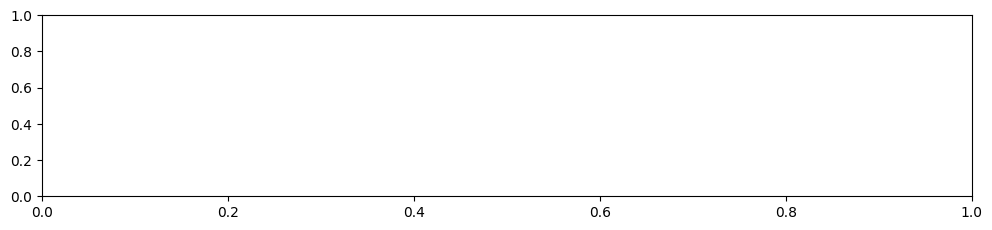

In [39]:
# Plotting the results
plt.figure(figsize=(12, 8))

# Plot training accuracies
plt.subplot(3, 1, 1)
plt.plot([100 * ratio for ratio in split_ratios], nn_train_accuracies, label='Nearest Neighbor (Train)', marker='o')
plt.plot([100 * ratio for ratio in split_ratios], random_train_accuracies, label='Random Classifier (Train)', marker='o')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Validation Set Size')
plt.legend()
plt.grid(True)

# Plot validation accuracies
plt.subplot(3, 1, 2)
plt.plot([100 * ratio for ratio in split_ratios], nn_val_accuracies, label='Nearest Neighbor (Validation)', marker='o')
plt.plot([100 * ratio for ratio in split_ratios], random_val_accuracies, label='Random Classifier (Validation)', marker='o')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Validation Set Size')
plt.legend()
plt.grid(True)

# Plot test accuracies
plt.subplot(3, 1, 3)
plt.plot([100 * ratio for ratio in split_ratios], nn_test_accuracies, label='Nearest Neighbor (Test)', marker='o')
plt.plot([100 * ratio for ratio in split_ratios], random_test_accuracies, label='Random Classifier (Test)', marker='o')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Validation Set Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

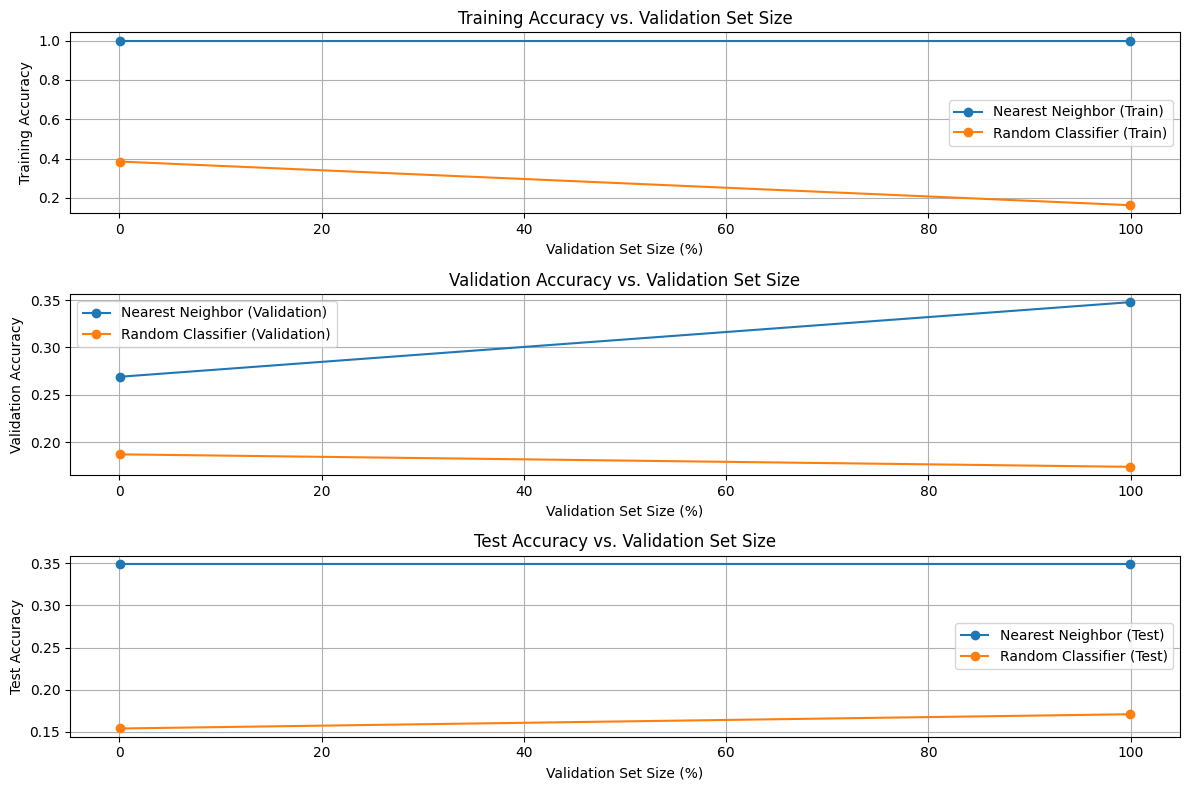

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define extreme split ratios
split_ratios = [0.001, 0.999]
nn_train_accuracies = []
random_train_accuracies = []
nn_val_accuracies = []
random_val_accuracies = []
nn_test_accuracies = []
random_test_accuracies = []

for ratio in split_ratios:
    # Split data
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, ratio)

    # Train Nearest Neighbor Classifier
    trainpred = NN(traindata, trainlabel, traindata)
    nn_train_accuracy = Accuracy(trainlabel, trainpred)
    nn_train_accuracies.append(nn_train_accuracy)

    valpred = NN(traindata, trainlabel, valdata)
    nn_val_accuracy = Accuracy(vallabel, valpred)
    nn_val_accuracies.append(nn_val_accuracy)

    testpred = NN(alltraindata, alltrainlabel, testdata)
    nn_test_accuracy = Accuracy(testlabel, testpred)
    nn_test_accuracies.append(nn_test_accuracy)

    # Train Random Classifier
    trainpred = RandomClassifier(traindata, trainlabel, traindata)
    random_train_accuracy = Accuracy(trainlabel, trainpred)
    random_train_accuracies.append(random_train_accuracy)

    valpred = RandomClassifier(traindata, trainlabel, valdata)
    random_val_accuracy = Accuracy(vallabel, valpred)
    random_val_accuracies.append(random_val_accuracy)

    testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
    random_test_accuracy = Accuracy(testlabel, testpred)
    random_test_accuracies.append(random_test_accuracy)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot training accuracies
plt.subplot(3, 1, 1)
plt.plot([100 * ratio for ratio in split_ratios], nn_train_accuracies, label='Nearest Neighbor (Train)', marker='o')
plt.plot([100 * ratio for ratio in split_ratios], random_train_accuracies, label='Random Classifier (Train)', marker='o')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Validation Set Size')
plt.legend()
plt.grid(True)

# Plot validation accuracies
plt.subplot(3, 1, 2)
plt.plot([100 * ratio for ratio in split_ratios], nn_val_accuracies, label='Nearest Neighbor (Validation)', marker='o')
plt.plot([100 * ratio for ratio in split_ratios], random_val_accuracies, label='Random Classifier (Validation)', marker='o')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Validation Set Size')
plt.legend()
plt.grid(True)

# Plot test accuracies
plt.subplot(3, 1, 3)
plt.plot([100 * ratio for ratio in split_ratios], nn_test_accuracies, label='Nearest Neighbor (Test)', marker='o')
plt.plot([100 * ratio for ratio in split_ratios], random_test_accuracies, label='Random Classifier (Test)', marker='o')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Validation Set Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Multiple Splits**

In [33]:
# Crossvalidation -> Obtaining accurate estimates for test accuracy

#NN
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [34]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34073003864848694
test accuracy is  0.34917953667953666


In [35]:
#Random Classifier
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=RandomClassifier):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [36]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=RandomClassifier))
testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.16899258341163595
test accuracy is  0.16143822393822393


In the case of nearest neighbours:

            - Average validation accuracy is  0.34073003864848694
            - Test accuracy is  0.34917953667953666
Implying that test accuracy is slight greater than average validation accuracy.

In the case of random classifiers:

            - Average validation accuracy is  0.16899258341163595
            - Test accuracy is  0.16143822393822393
Implying that average validation accuracy is slighly greater than test accuracy.

However, the two accuracies in both cases are almost the same provided we take consideration until 2 places after decimal points.

But since, we see two different comparisons, I think that there is no direct influence between average validation accuracy and test accuracy.


            

**Questions**

1. Does averaging the validation accuracy across multiple splits give more consistent results?

    - Yes, averaging validation accuracy over multiple splits gives a more consistent measure of how well the model performs. It helps smooth out any random fluctuations from individual splits.

2. Does it give more accurate estimate of test accuracy?
   
   - Averaging validation accuracy across multiple splits does not directly estimate test accuracy but helps in evaluating how well the model performs on unseen data. It improves the accuracy of predictions on the test set by ensuring the model is validated.

3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

    - Yes, more iterations will give a better estimate of model performance. With higher iterations, the results become more stable and reliable, as they average out and provide a clearer picture of how well the model performs.
    
    - Lesser iterations can lead to less reliable estimates, as the results may be more affected by anomalies in the data. This can result in less stable and less accurate model performance.

4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

     - Increasing the number of iterations can help deal with the variability in results when we have a very small training or validation dataset. It averages out the randomness and provides a more stable estimate of model performance.
     
     - However, having a small dataset; the the model might still struggle with limited data and overfitting, (SInce, there is very limited learning).